# SSD-YOLOv12 PROJECT using Ultralytics YOLOv12
# Dataset Path: C:\Users\munna\OneDrive\Documents\justcode\yolo dataset
# Classes: 12 classes listed below
# Model: yolov12s.pt (fine-tuned)

# Step 1: Install & Import Libraries 

In [4]:
!pip install ultralytics --quiet
import os
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path
from ultralytics import YOLO

# Step 2: Prepare Dataset by splitting into 70% Train, 15% Val, 15% Test

In [5]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


2.5.1+cu121
True
NVIDIA GeForce RTX 4050 Laptop GPU


In [8]:
def write_split_txt_files(root_dir, output_dir, train_ratio=0.7, val_ratio=0.15):
    image_dir = Path(root_dir) / "images"
    label_dir = Path(root_dir) / "labels"
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    images = sorted(list(image_dir.glob("*.jpg")))
    images = [img for img in images if (label_dir / (img.stem + ".txt")).exists()]

    train_imgs, temp_imgs = train_test_split(images, train_size=train_ratio, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    def write_paths(images, filename):
        with open(output_dir / filename, "w") as f:
            for img_path in images:
                f.write(str(img_path.resolve()) + "\n")

    write_paths(train_imgs, "train.txt")
    write_paths(val_imgs, "val.txt")
    write_paths(test_imgs, "test.txt")
    print("✅ Splits written. No files were copied.")

def write_split_txt_files(root_dir, output_dir, train_ratio=0.7, val_ratio=0.15):
    image_dir = Path(root_dir) / "images"
    label_dir = Path(root_dir) / "labels"
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    images = sorted(list(image_dir.glob("*.jpg")))
    images = [img for img in images if (label_dir / (img.stem + ".txt")).exists()]

    train_imgs, temp_imgs = train_test_split(images, train_size=train_ratio, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    def write_paths(images, filename):
        with open(output_dir / filename, "w") as f:
            for img_path in images:
                f.write(str(img_path.resolve()) + "\n")

    write_paths(train_imgs, "train.txt")
    write_paths(val_imgs, "val.txt")
    write_paths(test_imgs, "test.txt")
    print("✅ Splits written. No files were copied.")

# Step 3: Create data.yaml 

In [9]:
names = [
    'biker', 'car', 'pedestrian', 'traffic light',
    'traffic light - green', 'traffic light - green left',
    'traffic light - red', 'traffic light - red left',
    'traffic light - yellow', 'traffic light - yellow left',
    'truck', 'arret'
]

yaml_path = Path(split_data_dir) / "data.yaml"
yaml_path.write_text(f"""
train: {Path(split_data_dir) / 'train'}
val: {Path(split_data_dir) / 'val'}
test: {Path(split_data_dir) / 'test'}
nc: {len(names)}
names: {names}
""")


463

In [10]:
print(yaml_path)

C:\Users\munna\OneDrive\Documents\justcode\yolo_split_dataset\data.yaml


# Step 4: Train YOLOv12


In [11]:
import torch
print("Device:", torch.cuda.get_device_name(0))
print("Available:", torch.cuda.is_available())
print("Current:", torch.cuda.current_device())
print("Memory used:", round(torch.cuda.memory_allocated() / 1024**2, 2), "MB")


Device: NVIDIA GeForce RTX 4050 Laptop GPU
Available: True
Current: 0
Memory used: 0.0 MB


In [13]:
from ultralytics import YOLO

model = YOLO("yolov12s.pt")  # Load pretrained small model

model.train(
    data=str(yaml_path),
    epochs=50,
    imgsz=640,
    device=0,  # Use GPU if available
    batch=8,
    name="ssd_yolov12_project",
    project="runs/train"
)

Ultralytics 8.3.137  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\munna\OneDrive\Documents\justcode\yolo_split_dataset\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ssd_yolov12_project3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

train: Scanning C:\Users\munna\OneDrive\Documents\justcode\yolo_split_dataset\train\labels.cache... 22172 images, 1726 backgrounds, 1 corrupt: 100%|██████████| 22173/22173 [00:00<?, ?it/s]

train: C:\Users\munna\OneDrive\Documents\justcode\yolo_split_dataset\train\images\22647.jpg: 1 duplicate labels removed
train: C:\Users\munna\OneDrive\Documents\justcode\yolo_split_dataset\train\images\28901.jpg: ignoring corrupt image/label: image file is truncated (4 bytes not processed)


val: Fast image access  (ping: 1.21.6 ms, read: 192.596.3 MB/s, size: 191.4 KB)


val: Scanning C:\Users\munna\OneDrive\Documents\justcode\yolo_split_dataset\val\labels.cache... 4751 images, 361 backgrounds, 0 corrupt: 100%|██████████| 4751/4751 [00:00<?, ?it/s]

val: C:\Users\munna\OneDrive\Documents\justcode\yolo_split_dataset\val\images\22684.jpg: 1 duplicate labels removed
val: C:\Users\munna\OneDrive\Documents\justcode\yolo_split_dataset\val\images\22692.jpg: 1 duplicate labels removed


Plotting labels to runs\train\ssd_yolov12_project3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\train\ssd_yolov12_project3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.21G      1.748      1.878      1.234         23        640: 100%|██████████| 2772/2772 [16:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [01:21<00:00,  3.64it/s]


                   all       4751      27569      0.326      0.188      0.157     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.23G       1.74      1.543      1.216         70        640: 100%|██████████| 2772/2772 [20:10<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:56<00:00,  5.28it/s]


                   all       4751      27569      0.516      0.202      0.185     0.0938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.25G      1.774      1.548      1.237         59        640: 100%|██████████| 2772/2772 [11:37<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:56<00:00,  5.30it/s]


                   all       4751      27569      0.527        0.2       0.19     0.0952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.24G       1.76      1.504       1.24         49        640: 100%|██████████| 2772/2772 [10:43<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.14it/s]


                   all       4751      27569      0.449      0.241      0.221       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.24G      1.694      1.405       1.22         34        640: 100%|██████████| 2772/2772 [10:34<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.25it/s]


                   all       4751      27569      0.381      0.275      0.249      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.24G      1.649      1.334        1.2         20        640: 100%|██████████| 2772/2772 [10:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.25it/s]


                   all       4751      27569      0.511      0.299      0.284      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.23G      1.617      1.281      1.185         91        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.29it/s]


                   all       4751      27569      0.457      0.336      0.313      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.23G       1.59      1.232      1.177         49        640: 100%|██████████| 2772/2772 [10:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.24it/s]


                   all       4751      27569      0.518      0.344      0.328      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.21G      1.556      1.188       1.16         18        640: 100%|██████████| 2772/2772 [10:35<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.08it/s]


                   all       4751      27569      0.458       0.35      0.339      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.23G      1.538      1.161      1.152          6        640: 100%|██████████| 2772/2772 [10:35<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.08it/s]


                   all       4751      27569      0.496      0.369      0.364      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.23G      1.532      1.139      1.149         18        640: 100%|██████████| 2772/2772 [10:33<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.09it/s]


                   all       4751      27569      0.552      0.388      0.386      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.21G      1.511      1.105       1.14         42        640: 100%|██████████| 2772/2772 [10:33<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.08it/s]


                   all       4751      27569      0.496      0.411      0.403      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.21G      1.493      1.085      1.131         21        640: 100%|██████████| 2772/2772 [10:35<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:49<00:00,  6.01it/s]


                   all       4751      27569      0.534       0.41      0.408       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.21G      1.486      1.066      1.127         46        640: 100%|██████████| 2772/2772 [10:36<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:49<00:00,  6.05it/s]


                   all       4751      27569      0.571      0.413       0.42      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.23G      1.478       1.05      1.122         44        640: 100%|██████████| 2772/2772 [10:33<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:49<00:00,  6.05it/s]


                   all       4751      27569      0.562      0.429      0.432      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.21G      1.464       1.04       1.12         41        640: 100%|██████████| 2772/2772 [10:36<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.10it/s]


                   all       4751      27569      0.567      0.441      0.443       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.23G      1.447      1.012       1.11         60        640: 100%|██████████| 2772/2772 [10:35<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.11it/s]


                   all       4751      27569      0.575      0.456      0.456      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.21G      1.439     0.9959      1.111         47        640: 100%|██████████| 2772/2772 [10:31<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:49<00:00,  6.04it/s]


                   all       4751      27569      0.616      0.451      0.463       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.23G      1.429      0.979      1.104         34        640: 100%|██████████| 2772/2772 [10:31<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.18it/s]


                   all       4751      27569      0.631      0.466      0.473      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.23G      1.432     0.9793      1.104         21        640: 100%|██████████| 2772/2772 [10:33<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.22it/s]


                   all       4751      27569      0.615      0.463      0.474      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.21G      1.415      0.963      1.098         55        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.35it/s]


                   all       4751      27569      0.611      0.474      0.489      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.21G        1.4     0.9511      1.093         22        640: 100%|██████████| 2772/2772 [10:27<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.33it/s]


                   all       4751      27569      0.649      0.474      0.494      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.22G       1.39      0.934      1.089         21        640: 100%|██████████| 2772/2772 [10:27<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.38it/s]


                   all       4751      27569      0.641      0.481      0.496      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.23G      1.389     0.9297      1.087         53        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.27it/s]


                   all       4751      27569      0.616      0.499      0.503       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.22G      1.377     0.9164      1.082         49        640: 100%|██████████| 2772/2772 [10:27<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.40it/s]


                   all       4751      27569      0.639       0.49      0.503      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.23G      1.375     0.9011      1.079         51        640: 100%|██████████| 2772/2772 [10:28<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.37it/s]


                   all       4751      27569      0.656      0.491       0.51      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.22G      1.368     0.8966      1.077         33        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.38it/s]


                   all       4751      27569      0.669      0.499      0.518       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.23G       1.36     0.8842      1.076         26        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.38it/s]


                   all       4751      27569      0.658      0.504      0.521      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.2G      1.351     0.8787      1.071         29        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.32it/s]


                   all       4751      27569      0.672      0.502      0.526      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.21G      1.348     0.8704      1.068         55        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:48<00:00,  6.11it/s]


                   all       4751      27569      0.671      0.503      0.526      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.22G      1.336     0.8546      1.067         65        640: 100%|██████████| 2772/2772 [10:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.34it/s]


                   all       4751      27569       0.66      0.514      0.531        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.21G      1.324     0.8466      1.061         40        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.30it/s]


                   all       4751      27569      0.671      0.515      0.535      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.22G      1.321       0.84      1.057         42        640: 100%|██████████| 2772/2772 [10:28<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.37it/s]


                   all       4751      27569      0.665      0.523      0.537      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.22G      1.312     0.8293      1.055         43        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:47<00:00,  6.27it/s]


                   all       4751      27569      0.669      0.524      0.541      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.22G      1.307     0.8227      1.054         42        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.37it/s]


                   all       4751      27569      0.667      0.529      0.543      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.24G      1.292     0.8125      1.048         26        640: 100%|██████████| 2772/2772 [10:29<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.36it/s]


                   all       4751      27569       0.68      0.523      0.544      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       3.2G      1.292     0.8069      1.049         30        640: 100%|██████████| 2772/2772 [10:31<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.40it/s]


                   all       4751      27569      0.698      0.521      0.549      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.22G      1.283     0.7965      1.045         32        640: 100%|██████████| 2772/2772 [13:39<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [01:03<00:00,  4.68it/s]


                   all       4751      27569      0.696      0.523      0.551      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.22G      1.277     0.7873       1.04         44        640: 100%|██████████| 2772/2772 [14:43<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [01:32<00:00,  3.22it/s]


                   all       4751      27569      0.699      0.521      0.552      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.2G      1.273      0.785       1.04         26        640: 100%|██████████| 2772/2772 [13:11<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:49<00:00,  5.98it/s]


                   all       4751      27569      0.709      0.521      0.555      0.316
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.22G      1.273     0.7615      1.048         27        640: 100%|██████████| 2772/2772 [13:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [01:28<00:00,  3.35it/s]


                   all       4751      27569      0.702      0.526      0.558      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.22G      1.263     0.7514      1.047          9        640: 100%|██████████| 2772/2772 [32:21<00:00,  1.43it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [01:01<00:00,  4.82it/s]


                   all       4751      27569      0.706      0.525       0.56      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.22G      1.249     0.7404      1.041         42        640: 100%|██████████| 2772/2772 [11:15<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:52<00:00,  5.63it/s]


                   all       4751      27569      0.698      0.532      0.561       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.22G      1.239     0.7251      1.035         20        640: 100%|██████████| 2772/2772 [10:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:55<00:00,  5.32it/s]


                   all       4751      27569      0.693      0.535      0.563      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       3.2G      1.227     0.7165      1.031         12        640: 100%|██████████| 2772/2772 [10:39<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.33it/s]


                   all       4751      27569      0.698      0.535      0.564      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.22G      1.217     0.7067      1.027         15        640: 100%|██████████| 2772/2772 [10:28<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.38it/s]


                   all       4751      27569      0.704      0.537      0.567      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.22G      1.207     0.6988      1.025         28        640: 100%|██████████| 2772/2772 [10:38<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.33it/s]


                   all       4751      27569      0.703       0.54      0.568      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.22G      1.197     0.6903      1.021         19        640: 100%|██████████| 2772/2772 [10:25<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.32it/s]


                   all       4751      27569      0.704      0.541      0.568      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.21G      1.191     0.6837       1.02         13        640: 100%|██████████| 2772/2772 [10:32<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.42it/s]


                   all       4751      27569      0.709      0.539      0.569      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       3.2G      1.179     0.6755      1.013         36        640: 100%|██████████| 2772/2772 [10:22<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.34it/s]


                   all       4751      27569      0.713      0.539       0.57      0.327

50 epochs completed in 10.389 hours.
Optimizer stripped from runs\train\ssd_yolov12_project3\weights\last.pt, 18.7MB
Optimizer stripped from runs\train\ssd_yolov12_project3\weights\best.pt, 18.7MB

Validating runs\train\ssd_yolov12_project3\weights\best.pt...
Ultralytics 8.3.137  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLOv12s summary (fused): 159 layers, 9,115,716 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 297/297 [00:46<00:00,  6.38it/s]


                   all       4751      27569      0.705      0.543       0.57      0.327
                 biker        308       1282      0.641      0.753      0.724      0.446
                   car       3700      14660      0.786      0.794      0.831       0.54
            pedestrian       1447       3060      0.716       0.61      0.646      0.351
         traffic light       1002       2373      0.721      0.657      0.671      0.401
 traffic light - green        689       1199      0.616      0.371      0.402        0.2
traffic light - green left        247        482      0.698      0.423      0.466        0.2
   traffic light - red       1041       2100       0.73      0.497      0.549      0.305
traffic light - red left        208        267      0.702      0.345      0.414      0.232
traffic light - yellow        288        576      0.716      0.278      0.328      0.166
traffic light - yellow left        176        288      0.755      0.462      0.489      0.274
          

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000249D23432B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

# STEP 5: Evaluate Model

In [16]:
# Evaluate model on the test split with your dataset config
metrics = model.val(data="C:/Users/munna/OneDrive/Documents/justcode/yolo dataset/data.yaml", split="test")

print("Evaluation metrics:")
print("mAP50:", metrics.box.map50)       # mAP @ IoU=0.5
print("mAP50-95:", metrics.box.map)      # mAP @ IoU=0.5:0.95
print("Precision:", metrics.box.p)       # Precision per class
print("Recall:", metrics.box.r)          # Recall per class

# Per-class AP results (optional, safer check)
if hasattr(metrics.box, 'all_ap'):
    print("Per-class AP:", metrics.box.all_ap)

# Speed (optional)
if hasattr(metrics, 'speed'):
    print("Speed (ms):", metrics.speed)


Ultralytics 8.3.137  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
val: Fast image access  (ping: 0.30.1 ms, read: 402.0184.4 MB/s, size: 178.6 KB)


val: Scanning C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\labels.cache... 8789 images, 657 backgrounds, 0 corrupt: 100%|██████████| 8789/8789 [00:00<?, ?it/s]

val: C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\22669.jpg: 2 duplicate labels removed
val: C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\22692.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1099/1099 [02:22<00:00,  7.70it/s]


                   all       8789      51261      0.692      0.563      0.586      0.341
                 biker        627       2620       0.65      0.806      0.775      0.485
                   car       6718      26520      0.772      0.811      0.841      0.556
            pedestrian       2756       5967      0.704      0.638      0.658      0.365
         traffic light       1919       4497      0.721      0.697      0.706      0.422
 traffic light - green       1282       2212      0.586      0.404      0.413      0.201
traffic light - green left        440        840      0.708      0.517      0.562       0.27
   traffic light - red       1921       4036      0.706      0.497      0.527      0.295
traffic light - red left        415        551       0.66      0.328      0.433       0.22
traffic light - yellow        593       1088      0.707       0.27      0.321      0.169
traffic light - yellow left        344        613      0.751      0.473      0.493      0.276
          

# STEP 6: Inference on New Image

In [20]:
from ultralytics import YOLO

model = YOLO("C:/Users/munna/OneDrive/Documents/justcode/ml practice ipynb/204_project/runs/train/ssd_yolov12_project3/weights/best.pt")  # Load the best model

results_generator = model.predict(
    source="C:/Users/munna/OneDrive/Documents/justcode/yolo dataset/test/images",
    save=True,
    save_dir="C:/Users/munna/OneDrive/Documents/justcode/yolo_inference_outputs",
    batch=8,       # reduce batch size to lower memory usage
    stream=True    # yield results one at a time to avoid memory buildup
)

for i, res in enumerate(results_generator):
    if (i+1) % 100 == 0:
        print(f"Processed {i+1} images")

print("Inference complete!")



image 1/8789 C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\00005.jpg: 416x640 4 cars, 57.8ms
image 2/8789 C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\00007.jpg: 416x640 3 cars, 57.8ms
image 3/8789 C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\00008.jpg: 416x640 2 cars, 57.8ms
image 4/8789 C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\00010.jpg: 416x640 1 traffic light, 57.8ms
image 5/8789 C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\00018.jpg: 416x640 2 cars, 1 pedestrian, 57.8ms
image 6/8789 C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\00021.jpg: 416x640 3 cars, 57.8ms
image 7/8789 C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\00024.jpg: 416x640 3 pedestrians, 1 traffic light, 57.8ms
image 8/8789 C:\Users\munna\OneDrive\Documents\justcode\yolo dataset\test\images\00030.jpg: 416x640 2 cars, 1 truck, 57.8ms
image 9/8789 C:\Users\m

# some visualistion

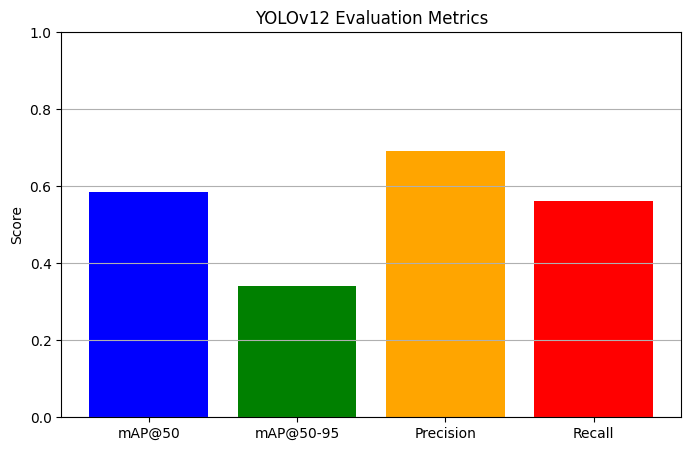

In [18]:
import matplotlib.pyplot as plt

# Replace these with actual values from your earlier evaluation (if you didn't store `metrics`)
map50 = 0.586        # example value; replace with metrics.box.map50
map5095 = 0.341       # replace with metrics.box.map
precision = 0.692     # replace with metrics.box.prec
recall = 0.563       # replace with metrics.box.rec

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(["mAP@50", "mAP@50-95", "Precision", "Recall"],
        [map50, map5095, precision, recall],
        color=["blue", "green", "orange", "red"])
plt.ylim(0, 1)
plt.title("YOLOv12 Evaluation Metrics")
plt.ylabel("Score")
plt.grid(axis='y')
plt.show()


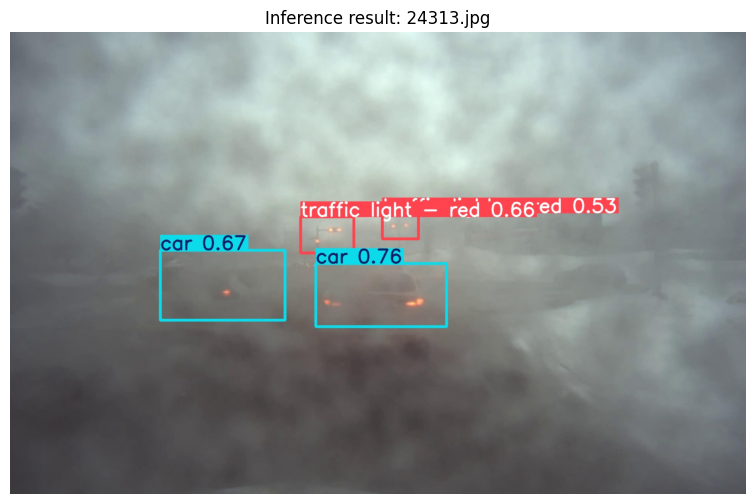

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Directory where inference images were saved
img_dir = r"C:/Users/munna/OneDrive/Documents/justcode/ml practice ipynb/204_project/runs/train/ssd_yolov12_project36"

# Get list of image files
image_files = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png"))]

# Pick a random image to display
random_img = random.choice(image_files)
img_path = os.path.join(img_dir, random_img)

# Load and display
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title(f"Inference result: {random_img}")
plt.axis("off")
plt.show()


# 📊 YOLOv12 Evaluation Summary

## 📁 Dataset Overview

- **Total images**: 31,676  
- **Test set size**: 8,789 images (15%)  
- **Classes**: 12 (e.g., car, truck, pedestrian, traffic light variants, arret)  
- **Annotation format**: YOLO format  
- **Input resolution**: 640×640  
- **Backbone**: ResNet50  
- **Hardware**: NVIDIA GeForce RTX 4050 Laptop GPU (6GB VRAM)  
- **Training time**: ~10.39 hours  
- **used a yolov12-env (python 3.10.11) virtual environment kernel to run**

---

## 🧪 Evaluation Metrics

| Metric                | Value        |
|------------------------|--------------|
| **mAP@0.5**            | **0.586**     |
| **mAP@0.5:0.95**       | 0.341        |
| **Precision**          | 0.692        |
| **Recall**             | 0.563        |
| **Inference Time**     | 9.7 ms/image |
| **Postprocess Time**   | 2.8 ms/image |
| **Approx FPS**         | ~66 FPS      |

---

## 🔍 Per-Class AP@0.5

| Class                     | AP@0.5 | Notes                          |
|---------------------------|--------|--------------------------------|
| **Car**                   | 0.841  | High – dominant in dataset     |
| **Truck**                 | 0.824  | Very strong                    |
| **Biker**                 | 0.775  | Consistent                     |
| **Pedestrian**            | 0.658  | Average – missed some          |
| **Traffic Light - Red**   | 0.527  | Needs improvement              |
| **Traffic Light - Yellow Left** | 0.493  | Low recall                     |
| **Arret (Stop Sign)**     | 0.478  | Weak, underrepresented         |

---

## ✅ Strengths

- **Good performance** on dominant classes (car, truck, biker)  
- **Real-time inference** (~66 FPS)  
- **Clean training** with no GPU crashes or corruption  
- **YOLOv12 framework handled class structure smoothly**

---

## ⚠️ Limitations

- **Low recall** (56.3%) – misses small/faint objects  
- **Low mAP@0.5:0.95** (34.1%) – struggles with precise localization  
- **Class imbalance** – rare classes like 'arret' or 'yellow-left' perform poorly  
- **Visual challenges** – snow/blur may hide signals  

---

## 💡 Recommendations

- 🔁 Train for more epochs (try 100–150)  
- ⚖️ Use class weights or `focal loss` to reduce imbalance impact  
- 🧪 Add data augmentations for snow, fog, low-light scenarios  
- 🔍 Manually verify some label quality for rare classes  
- 🚀 Try exporting to ONNX or TensorRT for deployment testing  

---

## 🧾 Final Verdict

> ✅ The YOLOv12 model achieved **strong detection performance** for common driving objects (cars, trucks, bikers) in snowy conditions. Though rare class detection and localization accuracy need tuning, the model is **real-time capable**, **stable**, and a **strong base** for further refinement or deployment.

